# Plotting class -playground

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import datajoint as dj 

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [4]:
# Make plots prettier
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [5]:
from dj_plotter import dj_plotter, make_circular_colormap, make_linear_colormap

### Only tracking

In [14]:
some_paths = Recording * Tracking.OpenField & 'animal_name = "100602"'
len(some_paths)

2

In [21]:
(Recording * Tracking.OpenField & 'animal_name = "100602"').fetch('timestamp', 'timestamps')

[array([datetime.datetime(2022, 4, 8, 12, 14, 50),
        datetime.datetime(2022, 4, 12, 11, 10, 59)], dtype=object),
 array([array([   4.87657104,    4.89672062,    4.91686063, ..., 1196.94320134,
        1196.96334133, 1196.98348141]),
        array([   5.86829989,    5.89330344,    5.91830733, ..., 1462.93347667,
        1462.9584804 , 1462.98347459])], dtype=object)]

Drawing path-event plots:   0%|          | 0/1 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Downloads/fuer_martin
Saving figure under /Users/hotte/Downloads/fuer_martin


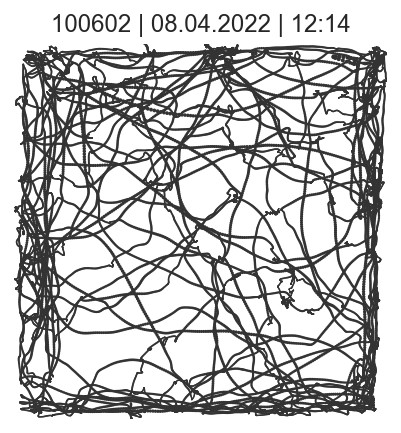

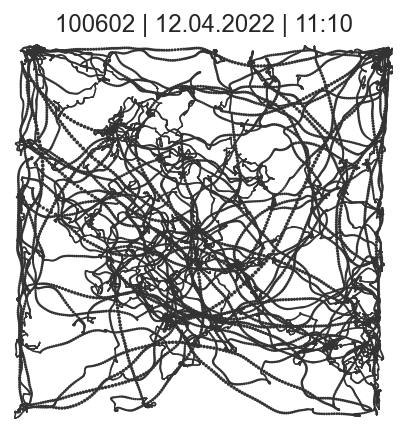

<Figure size 1440x1440 with 0 Axes>

In [30]:
plot = dj_plotter(some_paths, 
                  plots_per_view=1, 
                  save_path='/Users/hotte/Downloads/fuer_martin',
                  save_format='png',
                 )
plot.tracking(draw_speed=True, draw_angle=False)

### Ratemaps

In [7]:
# Define some restrictions ... 
restriction_dict = {
    'map_params_id' : 'A',
    'signal_type'   : 'events',
}

### Path-event plots

In [23]:
keys = (Recording & 'animal_name = "100602"').proj()

In [24]:
some_paths_events = (Recording * Tracking.OpenField * AngularTuning.Stats * 
                     AngularTuning * SignalTracking & keys & 'mvl > .7')

In [25]:
keys = (Recording * Tracking.OpenField * TuningMap * SignalTracking
        * AngularOccupancy * AngularTuning & some_paths_events.proj())

Drawing HD tuning:   0%|          | 0/4 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Downloads/fuer_martin


Drawing path-event plots:   0%|          | 0/4 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Downloads/fuer_martin


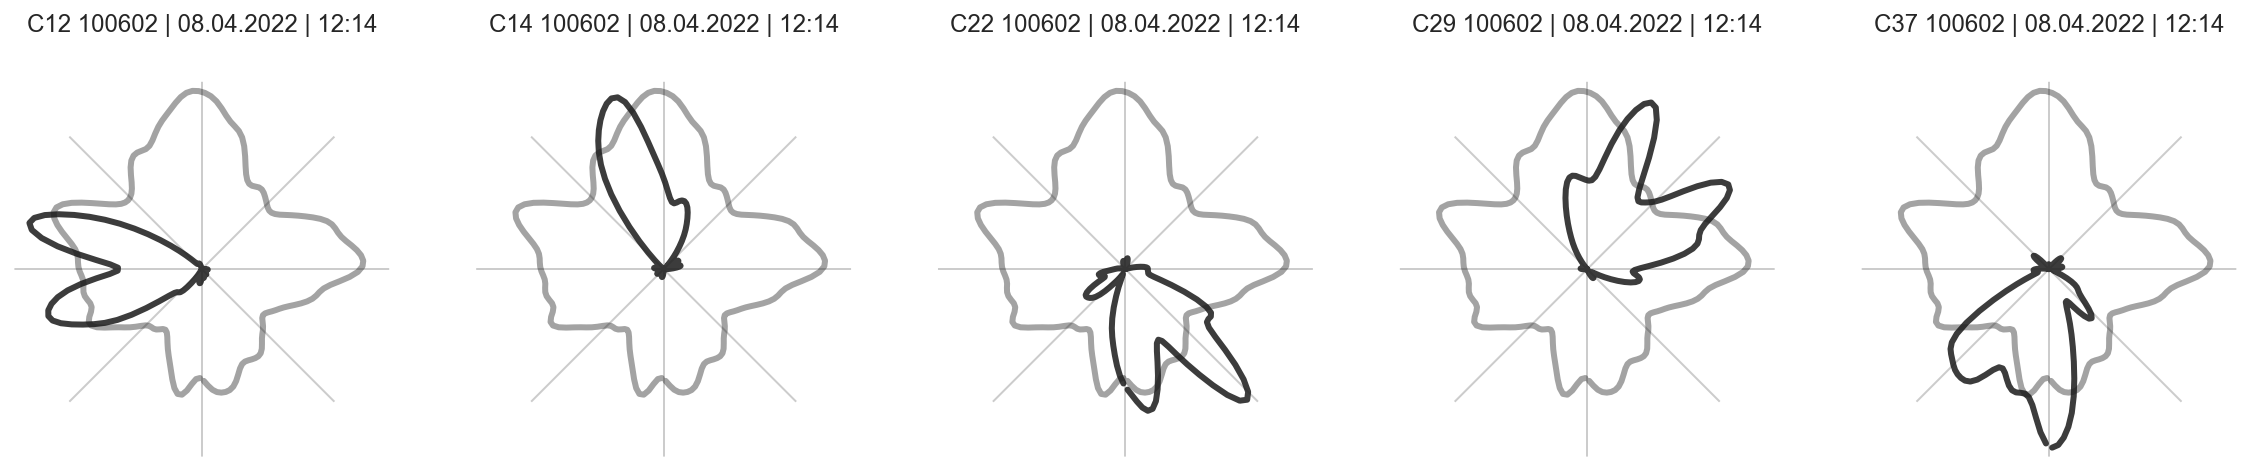

<Figure size 1440x1440 with 0 Axes>

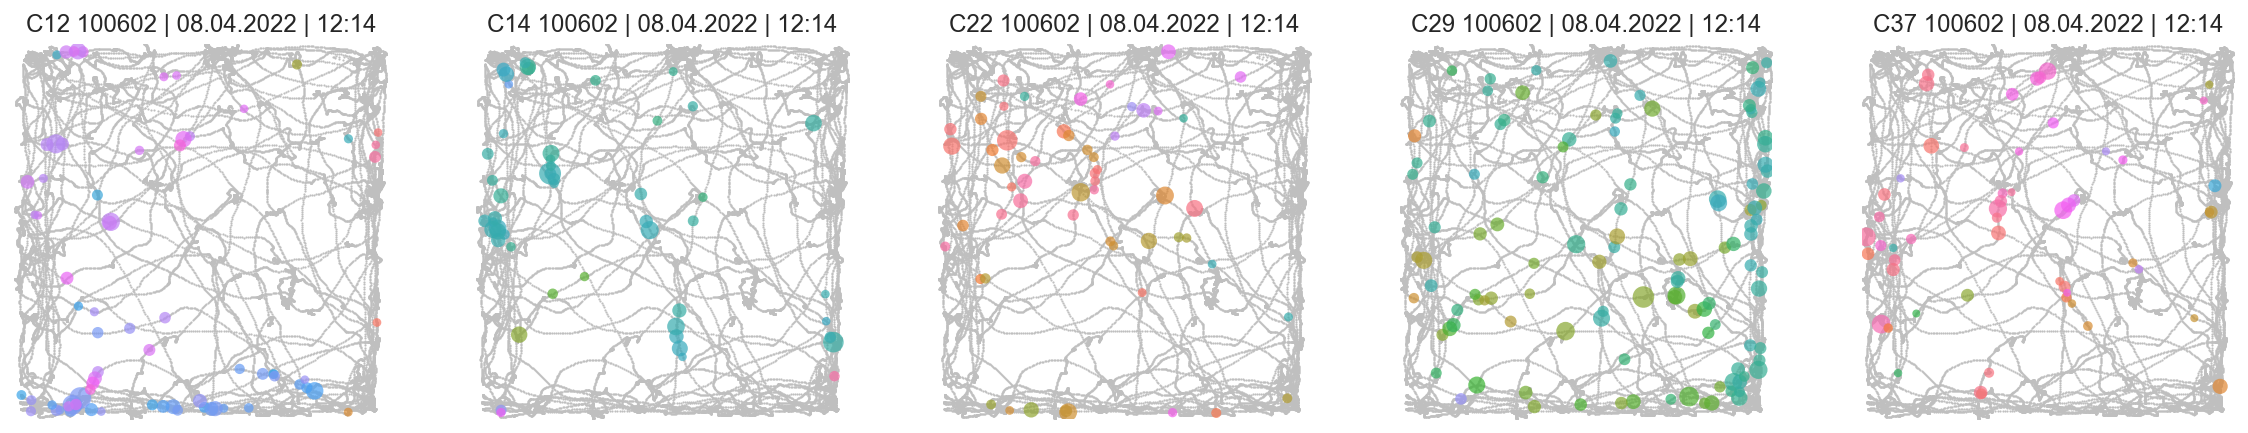

<Figure size 1440x1440 with 0 Axes>

Drawing tuningmaps:   0%|          | 0/4 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Downloads/fuer_martin


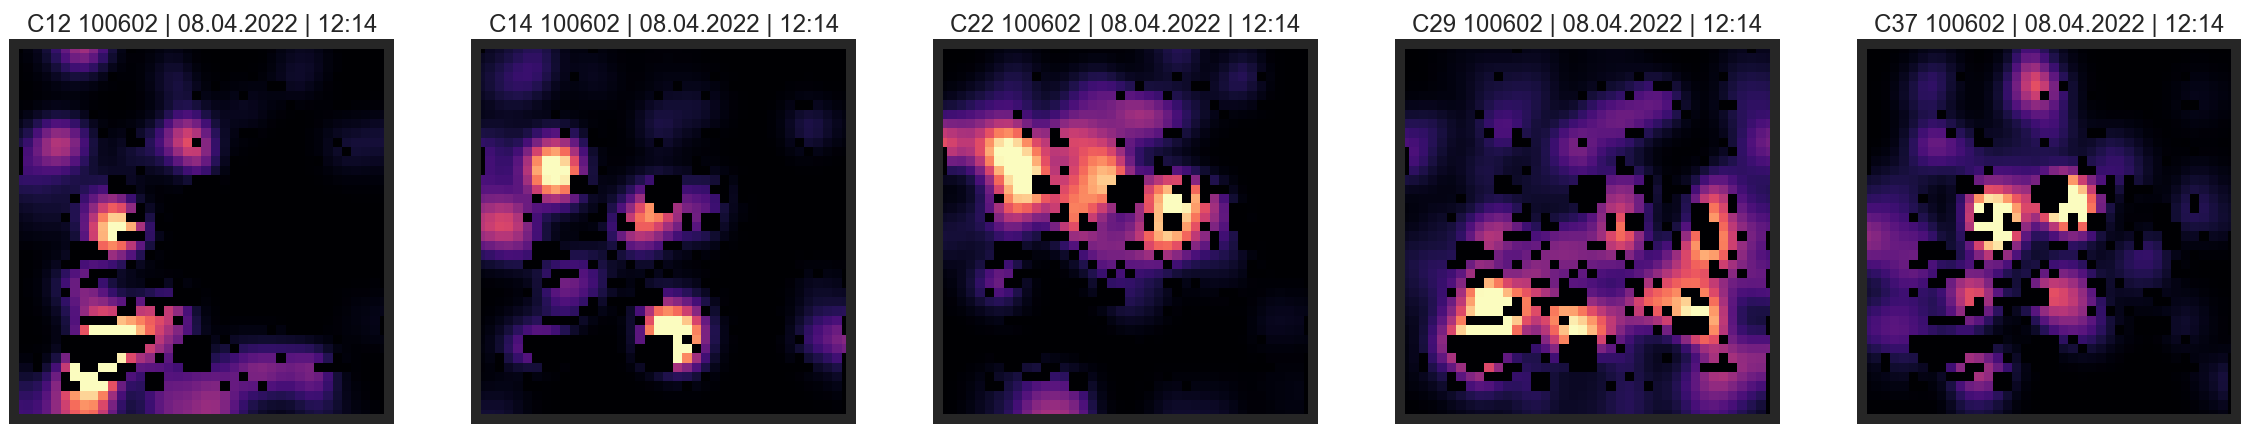

<Figure size 1440x1440 with 0 Axes>

In [27]:
plot = dj_plotter(keys, 
                  plots_per_view=5, 
                  total=5,
                  save_path='/Users/hotte/Downloads/fuer_martin',
                  save_format='png')
plot.hdtuning()
plot.path_event(draw_hd=True)
plot.tuningmaps()